In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import joblib

print("✅ Semua modul berhasil diimport")

✅ Semua modul berhasil diimport


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
imagePaths = '/content/drive/MyDrive/Data/DatasetDaun'  # Sesuaikan dengan path Anda
label_list = ['Nangka', 'Daun Sirih']
data = []
labels = []

print("📁 Memuat dataset...")

📁 Memuat dataset...


In [4]:
for label in label_list:
    image_dir = imagePaths + '/' + label + '/*.jpg'
    print(f"🔍 Mencari gambar di: {image_dir}")

    image_files = glob.glob(image_dir)
    print(f"📸 Ditemukan {len(image_files)} gambar untuk kelas {label}")

    for imagePath in image_files:
        try:
            image = cv2.imread(imagePath)
            if image is None:
                print(f"⚠️ Gagal membaca: {imagePath}")
                continue

            image = cv2.resize(image, (32, 32))
            data.append(image)
            labels.append(label)
        except Exception as e:
            print(f"❌ Error pada {imagePath}: {e}")

print(f"✅ Total data: {len(data)}")
print(f"✅ Total labels: {len(labels)}")

🔍 Mencari gambar di: /content/drive/MyDrive/Data/DatasetDaun/Nangka/*.jpg
📸 Ditemukan 51 gambar untuk kelas Nangka
🔍 Mencari gambar di: /content/drive/MyDrive/Data/DatasetDaun/Daun Sirih/*.jpg
📸 Ditemukan 51 gambar untuk kelas Daun Sirih
✅ Total data: 102
✅ Total labels: 102


In [5]:
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

print(f"📊 Shape data: {data.shape}")

📊 Shape data: (102, 32, 32, 3)


In [6]:
print("\n🔤 Encoding labels...")
lb = LabelEncoder()
labels_encoded = lb.fit_transform(labels)
print(f"Labels encoded: {labels_encoded}")
print(f"Mapping: 0 = {lb.classes_[0]}, 1 = {lb.classes_[1]}")


🔤 Encoding labels...
Labels encoded: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mapping: 0 = Daun Sirih, 1 = Nangka


In [7]:
print("\n🔄 Feature extraction...")
# Flatten images untuk SVM (32x32x3 = 3072 features)
data_flat = data.reshape(data.shape[0], -1)
print(f"📊 Shape data setelah flatten: {data_flat.shape}")


🔄 Feature extraction...
📊 Shape data setelah flatten: (102, 3072)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data_flat, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"📊 Ukuran data train: {X_train.shape}")
print(f"📊 Ukuran data test: {X_test.shape}")
print(f"📊 Distribusi kelas train: {np.unique(y_train, return_counts=True)}")
print(f"📊 Distribusi kelas test: {np.unique(y_test, return_counts=True)}")

📊 Ukuran data train: (81, 3072)
📊 Ukuran data test: (21, 3072)
📊 Distribusi kelas train: (array([0, 1]), array([40, 41]))
📊 Distribusi kelas test: (array([0, 1]), array([11, 10]))


In [9]:
print("\n📏 Standardisasi data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Standardisasi selesai")


📏 Standardisasi data...
✅ Standardisasi selesai


In [10]:
print("\n🤖 Membangun model SVM...")
# Beberapa opsi kernel bisa dicoba:
# - 'linear': untuk data linear separable
# - 'rbf': untuk data non-linear (default)
# - 'poly': untuk data polynomial

svm_model = SVC(
    kernel='rbf',           # Radial Basis Function kernel
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Kernel coefficient
    probability=True,       # Untuk mendapatkan probability
    random_state=42
)

print("📋 Parameter SVM:")
print(f"  - Kernel: {svm_model.kernel}")
print(f"  - C: {svm_model.C}")
print(f"  - Gamma: {svm_model.gamma}")


🤖 Membangun model SVM...
📋 Parameter SVM:
  - Kernel: rbf
  - C: 1.0
  - Gamma: scale


In [11]:
print("\n🎯 Training model SVM...")
svm_model.fit(X_train_scaled, y_train)
print("✅ Training selesai!")


🎯 Training model SVM...
✅ Training selesai!


In [12]:
y_train_pred = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"📊 Akurasi training: {train_accuracy:.4f}")

📊 Akurasi training: 0.9877


In [13]:
print("\n📈 Evaluasi model...")
y_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_list))
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")


📈 Evaluasi model...
📋 Classification Report:
              precision    recall  f1-score   support

      Nangka       0.92      1.00      0.96        11
  Daun Sirih       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21

🎯 Test Accuracy: 0.9524



📊 Confusion Matrix:


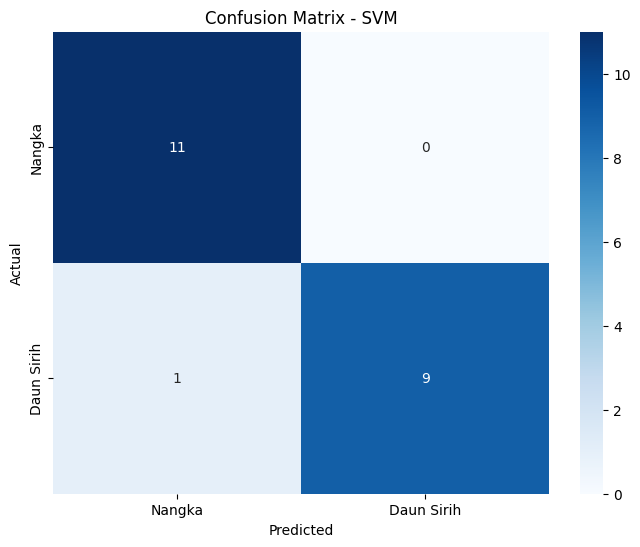

In [14]:
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_list, yticklabels=label_list)
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
print("\n🧪 Testing model dengan gambar baru...")

def predict_image(image_path, model, scaler, label_encoder, target_size=(32, 32)):
    """Fungsi untuk memprediksi gambar baru"""
    try:
        # Baca dan preprocess gambar
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Gagal membaca gambar: {image_path}")
            return None, None, None

        original_image = image.copy()
        image = cv2.resize(image, target_size)
        image_processed = image.astype('float32') / 255.0

        # Flatten dan scale
        image_flat = image_processed.reshape(1, -1)
        image_scaled = scaler.transform(image_flat)

        # Predict
        prediction_proba = model.predict_proba(image_scaled)
        prediction_class = model.predict(image_scaled)

        # Decode label
        predicted_label = label_encoder.inverse_transform(prediction_class)[0]
        confidence = prediction_proba[0][prediction_class[0]]

        return original_image, predicted_label, confidence

    except Exception as e:
        print(f"❌ Error dalam prediksi: {e}")
        return None, None, None

# Test dengan contoh gambar dari setiap kelas
print("\n🔍 Testing dengan contoh gambar...")

# Cari contoh gambar untuk testing
test_images = []
for label in label_list:
    image_dir = imagePaths + '/' + label + '/*.jpg'
    image_files = glob.glob(image_dir)
    if image_files:
        test_images.append((image_files[0], label))  # Ambil gambar pertama dari setiap kelas

for image_path, true_label in test_images:
    print(f"\n🧪 Testing: {image_path}")
    print(f"📌 True label: {true_label}")

    image, pred_label, confidence = predict_image(image_path, svm_model, scaler, lb)

    if image is not None:
        # Tambahkan teks prediksi ke gambar
        result_text = f"Pred: {pred_label} ({confidence:.2%}) | True: {true_label}"
        cv2.putText(image, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Tampilkan gambar
        print(f"🎯 Prediction: {pred_label} (Confidence: {confidence:.2%})")
        print(f"✅ {'CORRECT' if pred_label == true_label else 'WRONG'}")
        cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
print("\n💾 Menyimpan model...")
joblib.dump(svm_model, 'svm_leaf_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lb, 'label_encoder.pkl')

print("✅ Model berhasil disimpan:")
print("   - svm_leaf_classifier.pkl")
print("   - scaler.pkl")
print("   - label_encoder.pkl")


💾 Menyimpan model...
✅ Model berhasil disimpan:
   - svm_leaf_classifier.pkl
   - scaler.pkl
   - label_encoder.pkl


In [17]:
print("\n🔧 Contoh loading model...")
loaded_model = joblib.load('svm_leaf_classifier.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

print("✅ Model berhasil diload")


🔧 Contoh loading model...
✅ Model berhasil diload


In [18]:
if svm_model.kernel == 'linear':
    print("\n📊 Visualisasi Support Vectors...")
    print(f"Jumlah support vectors: {len(svm_model.support_vectors_)}")
    print(f"Koefisien SVM: {svm_model.coef_.shape}")

In [19]:
print("\n" + "="*50)
print("🎉 SUMMARY - SVM LEAF CLASSIFICATION")
print("="*50)
print(f"📊 Total Data: {len(data)} gambar")
print(f"🎯 Accuracy: {test_accuracy:.4f}")
print(f"🔧 Kernel: {svm_model.kernel}")
print(f"📈 Training samples: {X_train.shape[0]}")
print(f"🧪 Test samples: {X_test.shape[0]}")
print(f"💾 Model saved: svm_leaf_classifier.pkl")
print("="*50)


🎉 SUMMARY - SVM LEAF CLASSIFICATION
📊 Total Data: 102 gambar
🎯 Accuracy: 0.9524
🔧 Kernel: rbf
📈 Training samples: 81
🧪 Test samples: 21
💾 Model saved: svm_leaf_classifier.pkl
